In [27]:
!mkdir Data

A subdirectory or file Data already exists.


In [28]:
!kaggle datasets list -s 'insurance'

ref                                                title                                        size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------  ------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
hhs/health-insurance-marketplace                   Health Insurance Marketplace                829MB  2017-05-01 20:16:50          21928        556  0.7352941        
mhdzahier/travel-insurance                         Travel Insurance                            463KB  2019-01-28 01:43:39           7225         86  0.7058824        
hhs/health-insurance                               Health Insurance Coverage                     3KB  2017-03-02 18:40:23           7638        120  0.85294116       
anmolkumar/health-insurance-cross-sell-prediction  Health Insurance Cross Sell Prediction 🏠 🏥    6MB  2020-09-11 18:39:31          24790        610  1.0             

In [29]:
!kaggle datasets download -d mirichoi0218/insurance


  0%|          | 0.00/16.0k [00:00<?, ?B/s]
100%|██████████| 16.0k/16.0k [00:00<00:00, 16.4MB/s]


In [30]:
!unzip -o insurance.zip -d ./Data

Archive:  insurance.zip
  inflating: ./Data/insurance.csv    


In [31]:
!del insurance.zip

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [33]:
df = pd.read_csv('./Data/insurance.csv')

In [34]:
df.shape

(1338, 7)

In [35]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Here I have used .describe(include='all') instead of .describe(), which describes all the columns ir-respective of the column type.
## It's observed that the below listed columns are not numeric.
- sex
- smoker
- region

In [36]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


## Check the unique values of the non-numeric columns

In [37]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [38]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [39]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

# Create the dictonaries to map the non-numeric values

In [40]:
sex = {
    'female': 1,
    'male': 0
}

In [41]:
smoker = {
    'yes': 1,
    'no': 0
}

In [42]:
region = {
    'southwest': 1, 
    'southeast': 2,
    'northwest': 3,
    'northeast': 4
}

## Replace the column values with dictonary values

In [43]:
df['sex'].replace(sex, inplace=True)
df['smoker'].replace(smoker, inplace=True)
df['region'].replace(region, inplace=True)

In [44]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,2.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,2.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,3.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,4.000000,63770.428010


In [45]:
df = pd.get_dummies(df, columns=['sex', 'children', 'smoker', 'region'])

In [46]:
df.head()

,age,bmi,charges,sex_0,sex_1,children_0,children_1,children_2,children_3,children_4,children_5,smoker_0,smoker_1,region_1,region_2,region_3,region_4
0,19,27.900,16884.92400,0,1,1,0,0,0,0,0,0,1,1,0,0,0
1,18,33.770,1725.55230,1,0,0,1,0,0,0,0,1,0,0,1,0,0
2,28,33.000,4449.46200,1,0,0,0,0,1,0,0,1,0,0,1,0,0
3,33,22.705,21984.47061,1,0,1,0,0,0,0,0,1,0,0,0,1,0
4,32,28.880,3866.85520,1,0,1,0,0,0,0,0,1,0,0,0,1,0


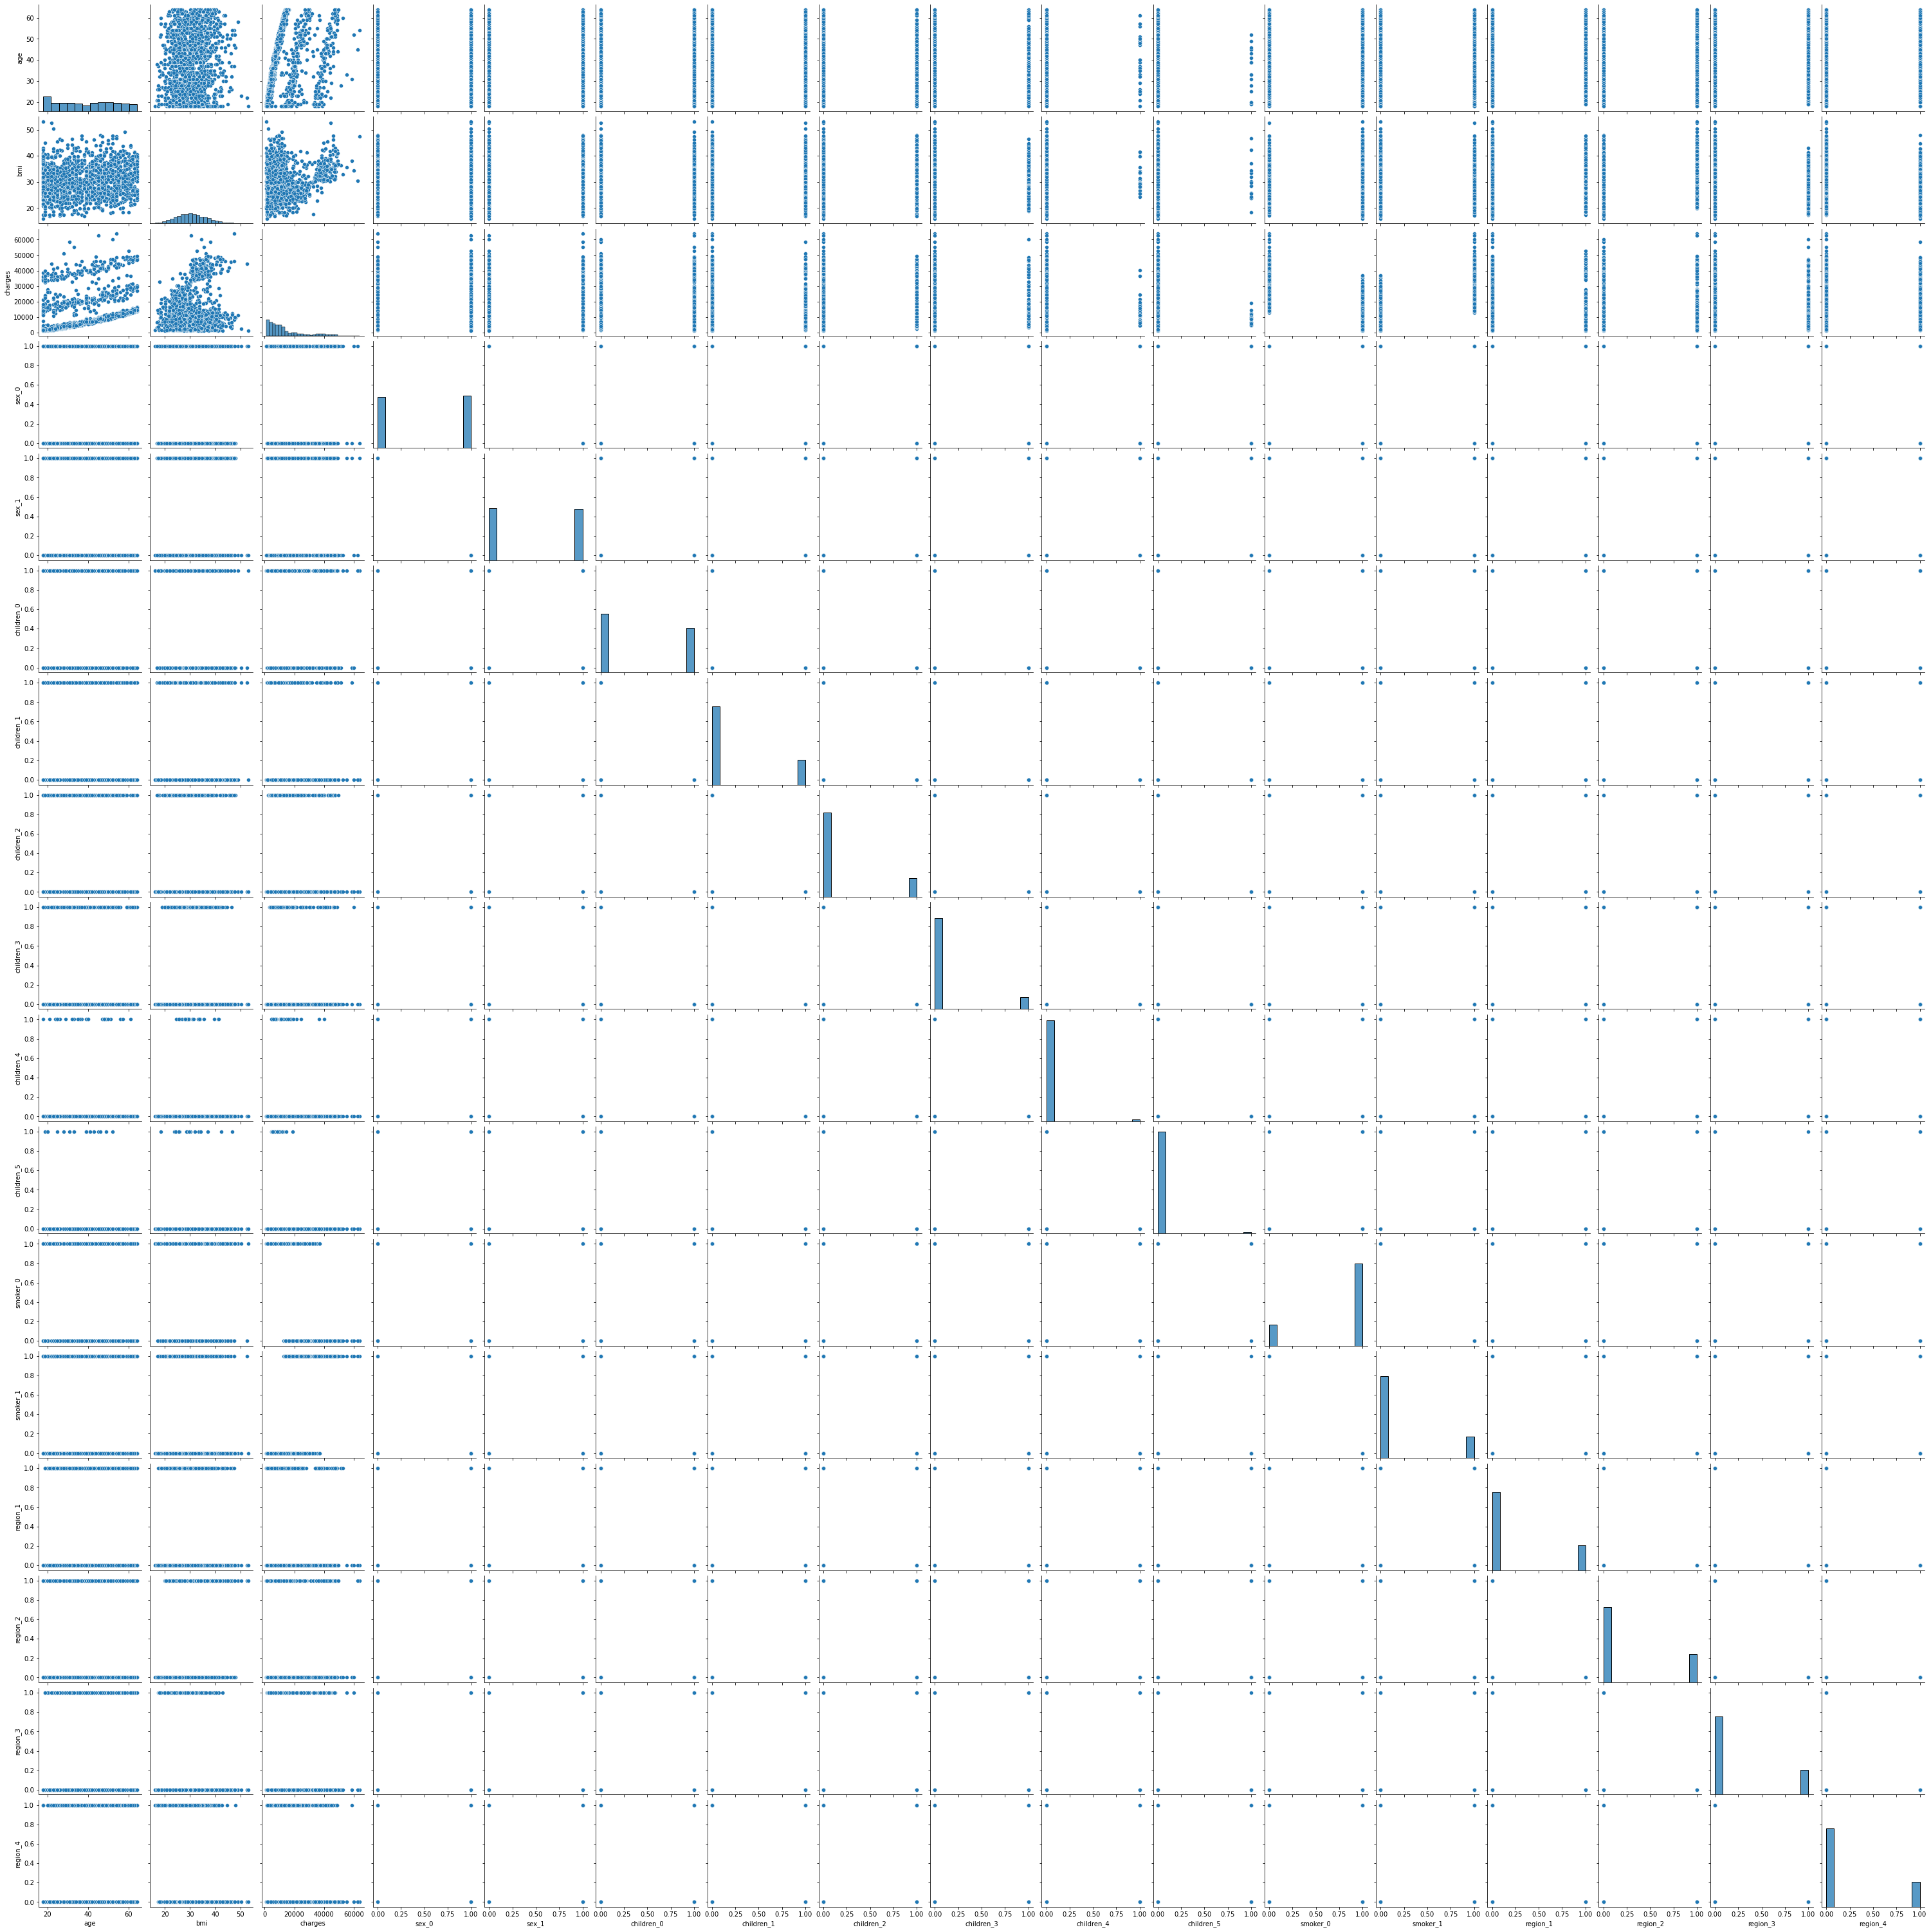

In [47]:
sns.pairplot(df)

In [48]:
df.nunique()

age             47
bmi            548
charges       1337
sex_0            2
sex_1            2
children_0       2
children_1       2
children_2       2
children_3       2
children_4       2
children_5       2
smoker_0         2
smoker_1         2
region_1         2
region_2         2
region_3         2
region_4         2
dtype: int64

<AxesSubplot:xlabel='sex_0', ylabel='count'>

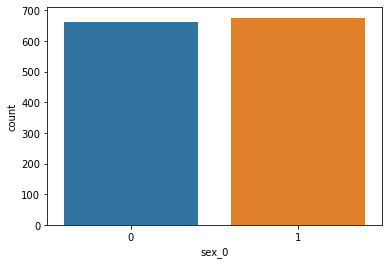

In [49]:
sns.countplot(x='sex_0', data=df)

<AxesSubplot:xlabel='children_0', ylabel='count'>

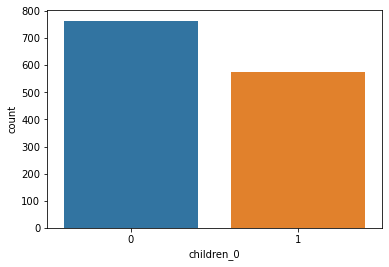

In [50]:
sns.countplot(x='children_0', data=df)

<AxesSubplot:xlabel='smoker_0', ylabel='count'>

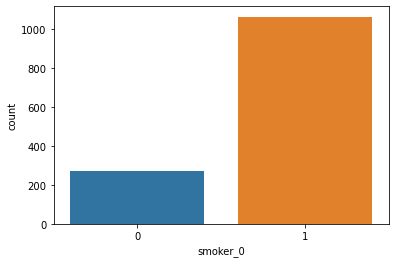

In [51]:
sns.countplot(x='smoker_0', data=df)

<AxesSubplot:xlabel='region_1', ylabel='count'>

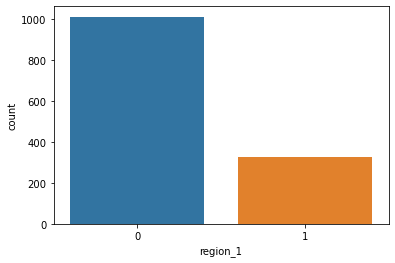

In [53]:
sns.countplot(x='region_1', data=df)

## Check for outliers

In [54]:
def get_the_count_of_outliers(data):
    q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
    iqr = q75 - q25
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    outliers = [x for x in data if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers))
    return len(outliers)

In [55]:
df.columns

Index(['age', 'bmi', 'charges', 'sex_0', 'sex_1', 'children_0', 'children_1',
       'children_2', 'children_3', 'children_4', 'children_5', 'smoker_0',
       'smoker_1', 'region_1', 'region_2', 'region_3', 'region_4'],
      dtype='object')

In [56]:
outlier_dict = {}
for col_value in df.columns:
    outlier_dict[col_value] = get_the_count_of_outliers(df[col_value])
    

Percentiles: 25th=27.000, 75th=51.000, IQR=24.000
Identified outliers: 0
Percentiles: 25th=26.296, 75th=34.694, IQR=8.398
Identified outliers: 9
Percentiles: 25th=4740.287, 75th=16639.913, IQR=11899.625
Identified outliers: 139
Percentiles: 25th=0.000, 75th=1.000, IQR=1.000
Identified outliers: 0
Percentiles: 25th=0.000, 75th=1.000, IQR=1.000
Identified outliers: 0
Percentiles: 25th=0.000, 75th=1.000, IQR=1.000
Identified outliers: 0
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 324
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 240
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 157
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 25
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 18
Percentiles: 25th=1.000, 75th=1.000, IQR=0.000
Identified outliers: 274
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 274
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified ou

In [57]:
outlier_dict

{'age': 0,
 'bmi': 9,
 'charges': 139,
 'sex_0': 0,
 'sex_1': 0,
 'children_0': 0,
 'children_1': 324,
 'children_2': 240,
 'children_3': 157,
 'children_4': 25,
 'children_5': 18,
 'smoker_0': 274,
 'smoker_1': 274,
 'region_1': 325,
 'region_2': 0,
 'region_3': 325,
 'region_4': 324}

In [58]:
pd.DataFrame([outlier_dict])

,age,bmi,charges,sex_0,sex_1,children_0,children_1,children_2,children_3,children_4,children_5,smoker_0,smoker_1,region_1,region_2,region_3,region_4
0,0,9,139,0,0,0,324,240,157,25,18,274,274,325,0,325,324


<AxesSubplot:>

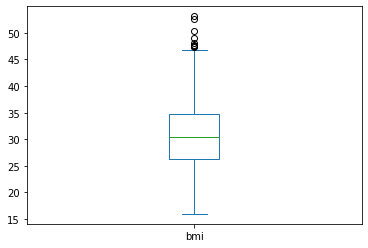

In [59]:
df['bmi'].plot.box()

<AxesSubplot:>

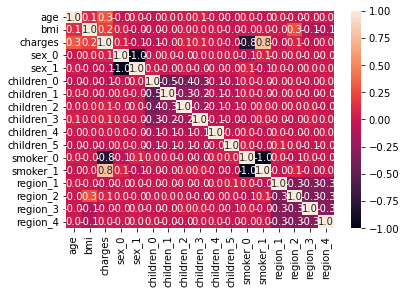

In [60]:
sns.heatmap(df.corr(), annot=True, fmt='.1f')

## Model Building

In [61]:
X = df.drop(columns=['charges'])
y = df['charges']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.33,
    random_state=24
)

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
lr = LinearRegression()

In [65]:
lr.fit(X_train, y_train)

LinearRegression()

In [66]:
pred = lr.predict(X_test)

In [67]:
from sklearn.metrics import r2_score

In [68]:
r2_score(y_test, pred)

0.7485171473232336

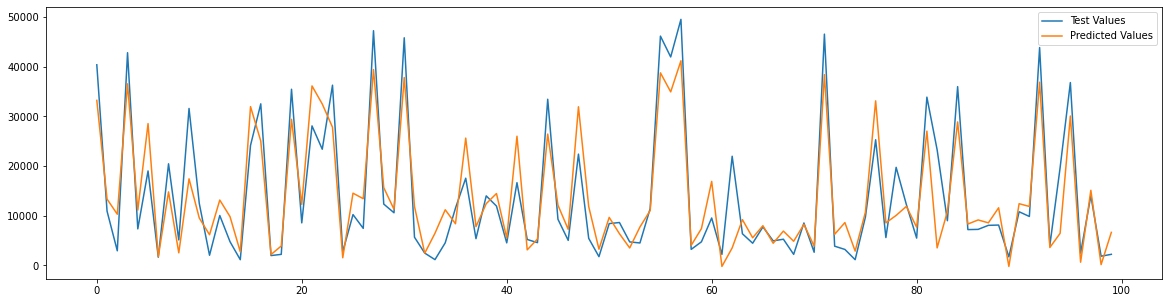

In [69]:
plt.figure(figsize=(20, 5))
plt.plot(y_test.values[:100], label='Test Values')
plt.plot(pred[:100], label='Predicted Values')
plt.legend()

## Ensemble models

## AdaBoostClassifier

In [70]:
from sklearn.ensemble import AdaBoostRegressor

In [71]:
model = AdaBoostRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
r2_score(y_test, pred)

0.8320705036893201

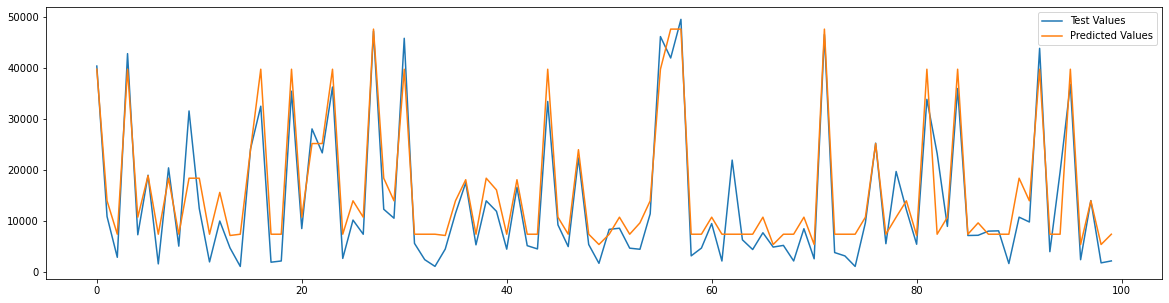

In [72]:
plt.figure(figsize=(20, 5))
plt.plot(y_test.values[:100], label='Test Values')
plt.plot(pred[:100], label='Predicted Values')
plt.legend()

## GradientBoostingRegressor

In [73]:
from sklearn.ensemble import GradientBoostingRegressor

In [74]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
r2_score(y_test, pred)

0.855504822729646

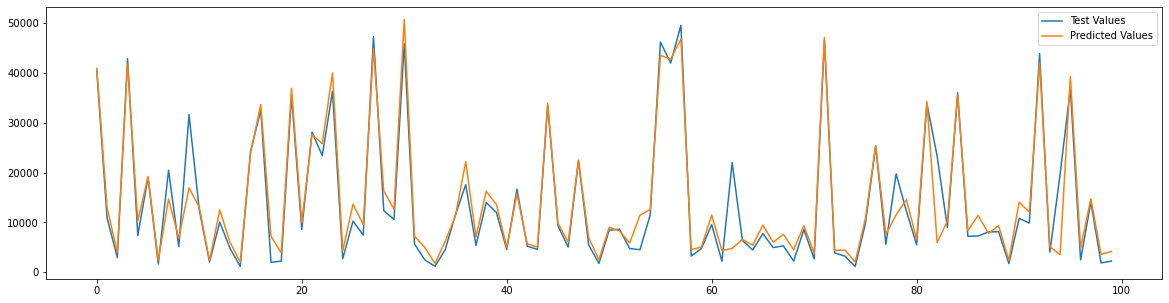

In [75]:
plt.figure(figsize=(20, 5))
plt.plot(y_test.values[:100], label='Test Values')
plt.plot(pred[:100], label='Predicted Values')
plt.legend()

## BaggingRegressor

In [76]:
from sklearn.ensemble import BaggingRegressor

In [77]:
model = BaggingRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
r2_score(y_test, pred)

0.8341768251743507

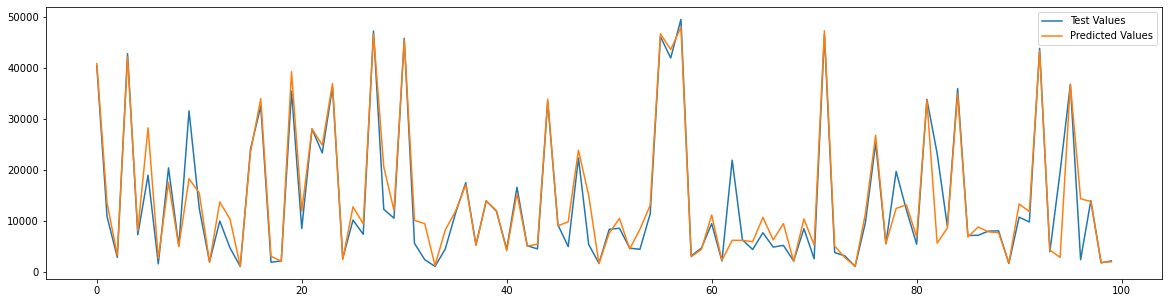

In [78]:
plt.figure(figsize=(20, 5))
plt.plot(y_test.values[:100], label='Test Values')
plt.plot(pred[:100], label='Predicted Values')
plt.legend()

## ExtraTreesRegressor

In [79]:
from sklearn.ensemble import ExtraTreesRegressor

In [80]:
model = ExtraTreesRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
r2_score(y_test, pred)

0.8042655947541146

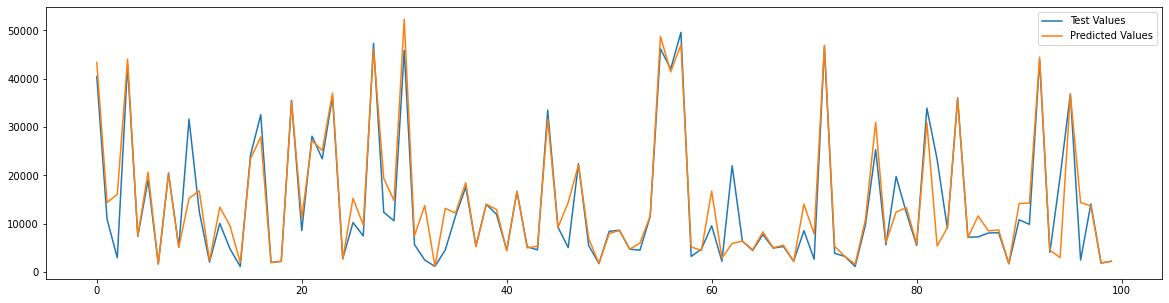

In [81]:
plt.figure(figsize=(20, 5))
plt.plot(y_test.values[:100], label='Test Values')
plt.plot(pred[:100], label='Predicted Values')
plt.legend()

## RandomForestRegressor

In [82]:
from sklearn.ensemble import RandomForestRegressor

In [83]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
r2_score(y_test, pred)

0.8384501550502959

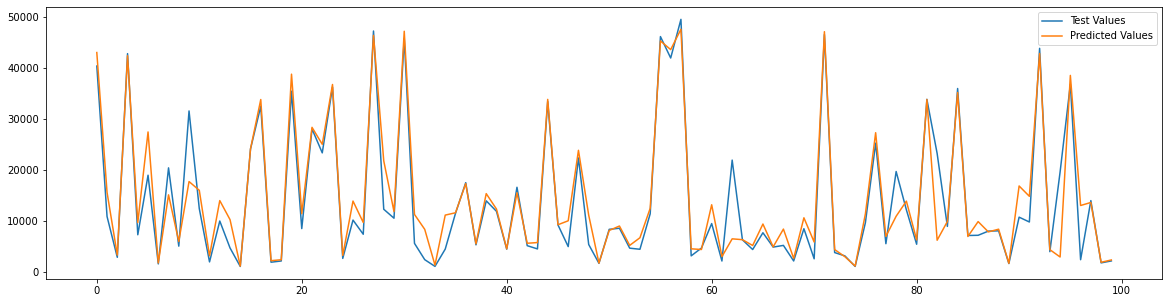

In [84]:
plt.figure(figsize=(20, 5))
plt.plot(y_test.values[:100], label='Test Values')
plt.plot(pred[:100], label='Predicted Values')
plt.legend()

## GradientBoostingRegressor

In [85]:
from sklearn.ensemble import GradientBoostingRegressor

In [86]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
r2_score(y_test, pred)

0.8564619543112496

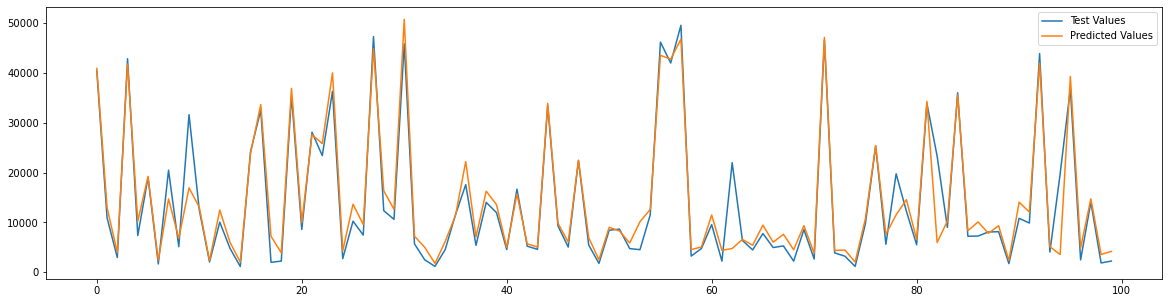

In [87]:
plt.figure(figsize=(20, 5))
plt.plot(y_test.values[:100], label='Test Values')
plt.plot(pred[:100], label='Predicted Values')
plt.legend()

## XGBRegressor

In [88]:
from xgboost import XGBRegressor

In [89]:
model = XGBRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
r2_score(y_test, pred)

0.8005820807482789

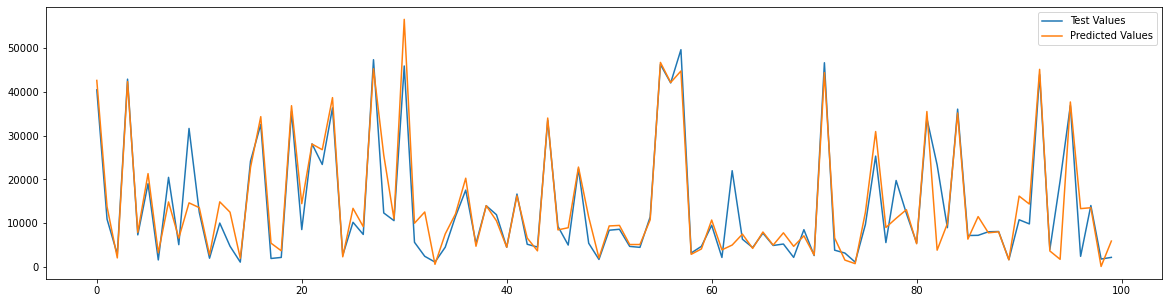

In [90]:
plt.figure(figsize=(20, 5))
plt.plot(y_test.values[:100], label='Test Values')
plt.plot(pred[:100], label='Predicted Values')
plt.legend()

In [91]:
from flaml import AutoML

In [92]:
model = AutoML()
model.fit(X_train, y_train, task='regression', metric='r2')

[flaml.automl: 06-20 10:46:36] {2390} INFO - task = regression
[flaml.automl: 06-20 10:46:36] {2392} INFO - Data split method: uniform
[flaml.automl: 06-20 10:46:36] {2396} INFO - Evaluation method: holdout
[flaml.automl: 06-20 10:46:36] {2465} INFO - Minimizing error metric: 1-r2
[flaml.automl: 06-20 10:46:36] {2513} WARNING - No search budget is provided via time_budget or max_iter. Training only one model per estimator. To tune hyperparameters for each estimator, please provide budget either via time_budget or max_iter.
[flaml.automl: 06-20 10:46:36] {162} WARNING - Starting points outside of the search space are removed. Remaining starting points: []
[flaml.automl: 06-20 10:46:36] {162} WARNING - Starting points outside of the search space are removed. Remaining starting points: []
[flaml.automl: 06-20 10:46:36] {2605} INFO - List of ML learners in AutoML Run: ['xgboost', 'lgbm', 'rf', 'extra_tree', 'xgb_limitdepth']
[flaml.automl: 06-20 10:46:36] {2897} INFO - iteration 0, current

In [93]:
print(f'Best ML Model: {model.best_estimator}')
print(f'Best hyperparmeter config: {model.best_config}')
print(f'Best Accuracy on validation data: {format(1 - model.best_loss)}')
print(f'Training duration of best run: {format(model.best_config_train_time)} s')

Best ML Model: rf
Best hyperparmeter config: {'n_estimators': 4, 'max_features': 1.0, 'max_leaves': 4}
Best Accuracy on validation data: 0.6079470645182993
Training duration of best run: 0.01800394058227539 s


In [94]:
!rmdir /Q /S "Data"